<a href="https://colab.research.google.com/github/gkrry2723/ML_pytorch_study/blob/master/BasicML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**basic ML with pytorch**

2020.07.29~



**1. Linear Regression**

* multivariate



- 1번째 버전

In [3]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

x_train=torch.FloatTensor([[73,80,75],[93,88,93],[89,91,90],[96,98,100],[73,66,70]])
y_train=torch.FloatTensor([[152],[185],[180],[196],[142]])

#model 초기화
W=torch.zeros((3,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

optimizer=optim.SGD([W,b],lr=1e-5)


nb_epochs=200
for epochs in range(1,nb_epochs+1):
  hypothesis=x_train.matmul(W)+b
  cost=torch.mean((hypothesis-y_train)**2)

  print('Epoch {:4d}/{} hypothesis:{},Cost{:.6f}'.format(epochs,nb_epochs,hypothesis.squeeze().detach,cost.item()))

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

Epoch    1/200 hypothesis:<built-in method detach of Tensor object at 0x7f6181e44288>,Cost29661.800781
Epoch    2/200 hypothesis:<built-in method detach of Tensor object at 0x7f61820cbfc0>,Cost9298.520508
Epoch    3/200 hypothesis:<built-in method detach of Tensor object at 0x7f6181e44630>,Cost2915.712402
Epoch    4/200 hypothesis:<built-in method detach of Tensor object at 0x7f61820cbfc0>,Cost915.040527
Epoch    5/200 hypothesis:<built-in method detach of Tensor object at 0x7f6181e44708>,Cost287.936096
Epoch    6/200 hypothesis:<built-in method detach of Tensor object at 0x7f61820cbfc0>,Cost91.371071
Epoch    7/200 hypothesis:<built-in method detach of Tensor object at 0x7f6181e44288>,Cost29.758249
Epoch    8/200 hypothesis:<built-in method detach of Tensor object at 0x7f61820cbfc0>,Cost10.445267
Epoch    9/200 hypothesis:<built-in method detach of Tensor object at 0x7f6181e44630>,Cost4.391237
Epoch   10/200 hypothesis:<built-in method detach of Tensor object at 0x7f61820cbfc0>,Cost2.

- 2번째 버전

In [ ]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

x_train=torch.FloatTensor([[73,80,75],[93,88,93],[89,91,90],[96,98,100],[73,66,70]])
y_train=torch.FloatTensor([[152],[185],[180],[196],[142]])

class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(3,1)
  
  def forward(self,x):
    return self.linear(x)

model=MultivariateLinearRegressionModel()
optimizer=optim.SGD(model.parameters(),lr=1e-5)

nb_epochs=200
for epochs in range(1,nb_epochs+1):
  hypothesis=model(x_train)
  cost=F.mse_loss(hypothesis,y_train)

  print('Epoch {:4d}/{} hypothesis:{},Cost{:.6f}'.format(epochs,nb_epochs,hypothesis.squeeze().detach,cost.item()))

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  

Epoch    1/200 hypothesis:<built-in method detach of Tensor object at 0x7ffb3a376240>,Cost16416.107422
Epoch    2/200 hypothesis:<built-in method detach of Tensor object at 0x7ffb3a376c18>,Cost5152.188965
Epoch    3/200 hypothesis:<built-in method detach of Tensor object at 0x7ffb3a376f78>,Cost1621.544189
Epoch    4/200 hypothesis:<built-in method detach of Tensor object at 0x7ffb3a376240>,Cost514.871826
Epoch    5/200 hypothesis:<built-in method detach of Tensor object at 0x7ffb3a376c18>,Cost167.985153
Epoch    6/200 hypothesis:<built-in method detach of Tensor object at 0x7ffb3a376f78>,Cost59.251476
Epoch    7/200 hypothesis:<built-in method detach of Tensor object at 0x7ffb3a376240>,Cost25.165997
Epoch    8/200 hypothesis:<built-in method detach of Tensor object at 0x7ffb3a376c18>,Cost14.478673
Epoch    9/200 hypothesis:<built-in method detach of Tensor object at 0x7ffb3a376f78>,Cost11.125534
Epoch   10/200 hypothesis:<built-in method detach of Tensor object at 0x7ffb3a376240>,Cost1

**2. Logistic Regression**
- binary classification

In [9]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

#재현 위함
torch.manual_seed(1)

x_data=[[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data=[[0],[0],[0],[1],[1],[1]]

x_train=torch.FloatTensor(x_data)
y_train=torch.FloatTensor(y_data)

#모델 초기화
W=torch.zeros((2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

#optimizer설정
optimizer=optim.SGD([W,b],lr=1)

nb_epochs=1000
for epoch in range(nb_epochs+1):
  
  #hypothesis=1/(1+torch.exp(-x_train.matmul(W)+b)
  hypothesis=torch.sigmoid(x_train.matmul(W)+b)

  #losses=-(y_train*torch.log(hypothesis)+(1-y_train)*torch.log(1-hypothesis))
  #cost=losses.mean()
  #위에 두개 합쳐서 binary classification인 경우에는
  cost = F.binary_cross_entropy(hypothesis,y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  #100번마다 로그 출력
  if epoch%100==0:
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() /len(correct_prediction)
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy: {:2.2f}%'.format(epoch, nb_epochs, cost.item(), accuracy*100))

#evalution
prediction = hypothesis >= torch.FloatTensor([0.5])
correct_prediction = prediction.float() == y_train
accuracy = correct_prediction.sum().item/len(correct_prediction)

Epoch    0/1000 Cost: 0.693147 Accuracy: 50.00%
Epoch  100/1000 Cost: 0.134722 Accuracy: 100.00%
Epoch  200/1000 Cost: 0.080643 Accuracy: 100.00%
Epoch  300/1000 Cost: 0.057900 Accuracy: 100.00%
Epoch  400/1000 Cost: 0.045300 Accuracy: 100.00%
Epoch  500/1000 Cost: 0.037261 Accuracy: 100.00%
Epoch  600/1000 Cost: 0.031672 Accuracy: 100.00%
Epoch  700/1000 Cost: 0.027556 Accuracy: 100.00%
Epoch  800/1000 Cost: 0.024394 Accuracy: 100.00%
Epoch  900/1000 Cost: 0.021888 Accuracy: 100.00%
Epoch 1000/1000 Cost: 0.019852 Accuracy: 100.00%


TypeError: ignored

**3. Softmax classification**
- binary classification이 아니라 많은 class를 구별하는 상황에서 사용하는 느낌


- Ver1. low level cross entropy

In [16]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

#재현 위함
torch.manual_seed(1)

#data
x_train=[[1,2,1,1],
         [2,1,3,2],
         [3,1,3,4],
         [4,1,5,5],
         [1,7,5,5],
         [1,2,5,6],
         [1,6,6,6],
         [1,7,7,7]]
y_train=[2,2,2,1,1,1,0,0]
x_train=torch.FloatTensor(x_train)
y_train=torch.LongTensor(y_train)

#모델 초기화
#sample 개수: 8, class 개수: 3, dim=4
W=torch.zeros([4,3],requires_grad=True)
b=torch.zeros(1, requires_grad=True)

optimizer=optim.SGD([W,b],lr=0.1)

nb_epochs=1000
for epochs in range(nb_epochs+1):
  #hypothesis=F.softmax(x_train.matmul(W)+b,dim=1)
  #y_one_hot=torch.zeros_like(hypothesis)
  #y_one_hot.scatter_(1,y_train.unsqueeze(1),1)
  #cost=(y_one_hot*-torch.log(F.softmax(hypothesis,dim=1))).sum(dim=1).mean()
  #위에 다 한번에 하려면
  z=x_train.matmul(W)+b
  cost=F.cross_entropy(z,y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epochs%100==0:
    print('Epoch {:4d}/{} Cost: {:6f}'.format(epochs, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433506
Epoch 1000/1000 Cost: 0.399962


**4. MNIST를 이용해서 지금까지 공부한거 적용해보기!**

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Epoch: 0001 cost = 0.535468519
Epoch: 0002 cost = 0.359274179
Epoch: 0003 cost = 0.331187516
Epoch: 0004 cost = 0.316578060
Epoch: 0005 cost = 0.307158172
Epoch: 0006 cost = 0.300180674
Epoch: 0007 cost = 0.295130193
Epoch: 0008 cost = 0.290851533
Epoch: 0009 cost = 0.287417054
Epoch: 0010 cost = 0.284379542
Epoch: 0011 cost = 0.281825215
Epoch: 0012 cost = 0.279800713
Epoch: 0013 cost = 0.277809024
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440855
Learning finished
Accuracy: 0.8862999677658081
Label:  8
Prediction:  3


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


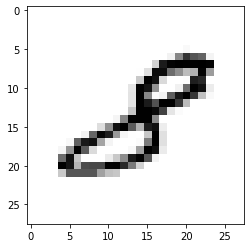

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# parameters
training_epochs = 15
batch_size = 100

#MNIST dataset
#root: 경로 || train: true일때-trainset 불러오기/false일때-testset 불러오기 
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

# MNIST data image of shape 28 * 28 = 784
# class 개수: 10
linear = torch.nn.Linear(784, 10, bias=True).to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()